In [196]:
import pandas as pd 
import numpy as np
# sklearn, lightgbm, scipy, statsmodels, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [197]:
train_df = pd.read_json("data/train.json")
test_df = pd.read_json("data/test.json")
test_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


таргет это price

In [199]:
test_df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address'],
      dtype='object')

In [200]:
train_df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

In [201]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


нет пустой даты

In [202]:
train_df.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [203]:
features = train_df[['bathrooms', 'bedrooms', 'interest_level']]
features

,bathrooms,bedrooms,interest_level
4,1.0,1,medium
6,1.0,2,low
9,1.0,2,medium
10,1.5,3,medium
15,1.0,0,low
...,...,...,...
124000,1.0,3,low
124002,1.0,2,medium
124004,1.0,1,medium
124008,1.0,2,medium


In [204]:
target = train_df['price']
target

4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 49352, dtype: int64

## Target analyze

<Axes: xlabel='price', ylabel='Count'>

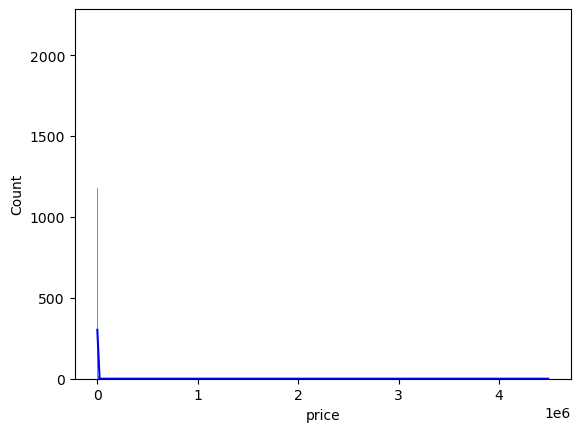

In [205]:
sns.histplot(target, bins='auto', kde=True, color='blue')

In [206]:
target.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [207]:
print(f'Max price {target.max()} vs Min price {target.min()}. Mean {target.mean()}, 50th perc {target.describe}')

Max price 4490000 vs Min price 43. Mean 3830.174035500081, 50th perc <bound method NDFrame.describe of 4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 49352, dtype: int64>


#### clearly see that there are some outliers in data

<Axes: ylabel='price'>

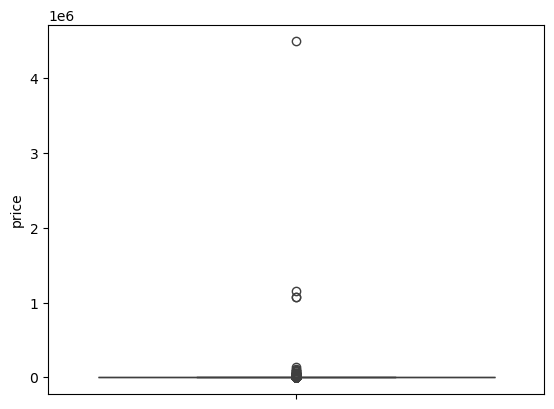

In [208]:
sns.boxplot(target)

In [209]:
sorted_target = target.sort_values()
sorted_target

53144          43
87511          45
117339        401
113599        695
113552        695
           ...   
123877     135000
55437     1070000
57803     1070000
12168     1150000
32611     4490000
Name: price, Length: 49352, dtype: int64

In [210]:
Q1 = np.percentile(target, 25)
Q3 = np.percentile(target, 75)
IQR = Q3 - Q1
outliers_below = Q1 - 1.5 * IQR
outliers_above = Q3 + 1.5 * IQR
print(f"Plausible data is in range {outliers_below} up to {outliers_above}")

Plausible data is in range 100.0 up to 6500.0


In [211]:
target_excl_outliers = target[(target >= outliers_below) & (target <= outliers_above)]
target_excl_outliers.count()

46564

<Axes: ylabel='price'>

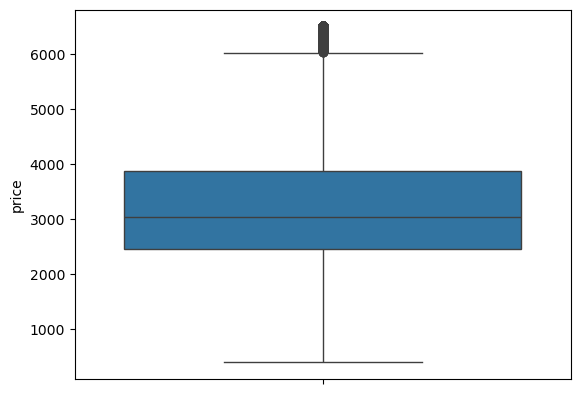

In [212]:
sns.boxplot(target_excl_outliers)

<Axes: ylabel='price'>

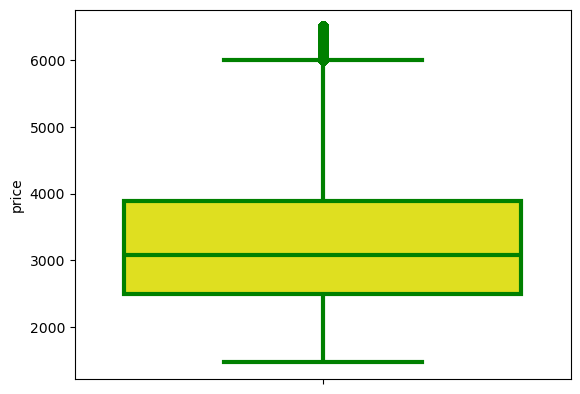

In [213]:
p_1 = np.percentile(target, 1)
p_99 = np.percentile(target, 99)
target_1_99 = target_excl_outliers[(target >= p_1) & (target <= p_99)]
sns.boxplot(target_1_99, linecolor='green', linewidth=3, color='yellow')

## Characteristics Analysis

In [214]:
features['interest_level'].dtype

dtype('O')

In [215]:
features['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: object

In [216]:
features['interest_level'].value_counts()

interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64

In [217]:
features['interest_level'] = features['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2}).infer_objects(copy=False)

/var/folders/rl/63cr5yk5557db_w0k3_knwm00000gn/T/ipykernel_9022/3511216964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['interest_level'] = features['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2}).infer_objects(copy=False)
/var/folders/rl/63cr5yk5557db_w0k3_knwm00000gn/T/ipykernel_9022/3511216964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['interest_level'] = features['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2}).infer_objects(copy=False)


In [218]:
features['interest_level'].value_counts()

interest_level
0    34284
1    11229
2     3839
Name: count, dtype: int64

## As we see about zero data after 6 counts, theres definetely an outliers

<Axes: ylabel='Count'>

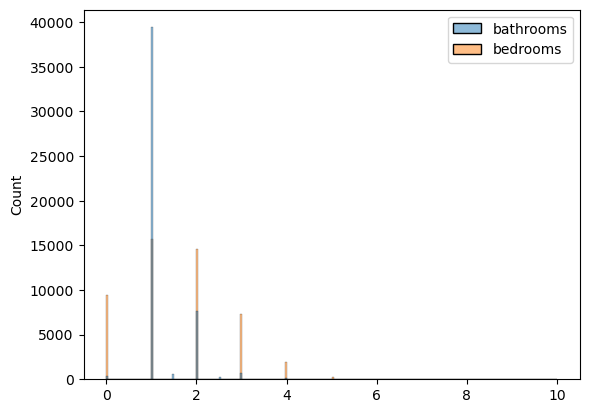

In [219]:
sns.histplot(features[['bathrooms', 'bedrooms']])

In [220]:
p_1_bath = np.percentile(features['bathrooms'], 1)
p_99_bath = np.percentile(features['bathrooms'], 99)
bath_1_to_99 = features['bathrooms'][(features['bathrooms'] >= p_1_bath) & (features['bathrooms'] <= p_99_bath)]
p_1_bed = np.percentile(features['bedrooms'], 1)
p_99_bed = np.percentile(features['bedrooms'], 99)
bed_1_to_99 = features['bedrooms'][(features['bedrooms'] >= p_1_bath) & (features['bedrooms'] <= p_99_bath)]
p_1_intlvl = np.percentile(features['interest_level'], 1)
p_99_intlvl = np.percentile(features['interest_level'], 99)
intlvl_1_to_99 = features['interest_level'][(features['interest_level'] >= p_1_bath) & (features['interest_level'] <= p_99_bath)]

<Axes: ylabel='Count'>

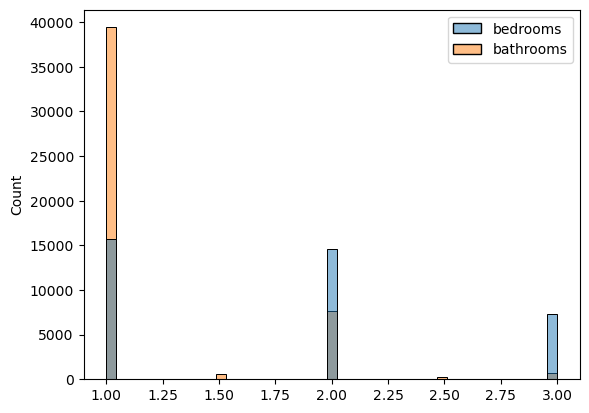

In [221]:
sns.histplot([bed_1_to_99, bath_1_to_99])

## bathrooms counts may be float value. What TF?

In [222]:
bath_1_to_99.value_counts()

bathrooms
1.0    39422
2.0     7660
3.0      745
1.5      645
2.5      277
Name: count, dtype: int64

In [223]:
bed_1_to_99.value_counts()

bedrooms
1    15752
2    14623
3     7276
Name: count, dtype: int64

## Complex analysis

In [224]:
corr_df = features
corr_df['price'] = target
corr_df.head()

/var/folders/rl/63cr5yk5557db_w0k3_knwm00000gn/T/ipykernel_9022/3477592430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['price'] = target


,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795


In [225]:
corr = corr_df.corr()
corr

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.533446,-0.082573,0.069661
bedrooms,0.533446,1.000000,0.027293,0.051788
interest_level,-0.082573,0.027293,1.000000,-0.023783
price,0.069661,0.051788,-0.023783,1.000000


<Axes: >

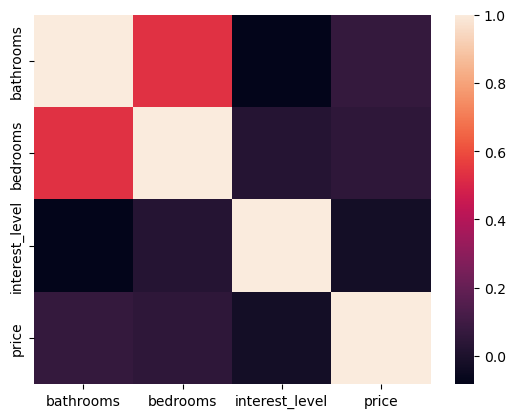

In [226]:
sns.heatmap(corr)

#### Below we can see that we need normalize our price

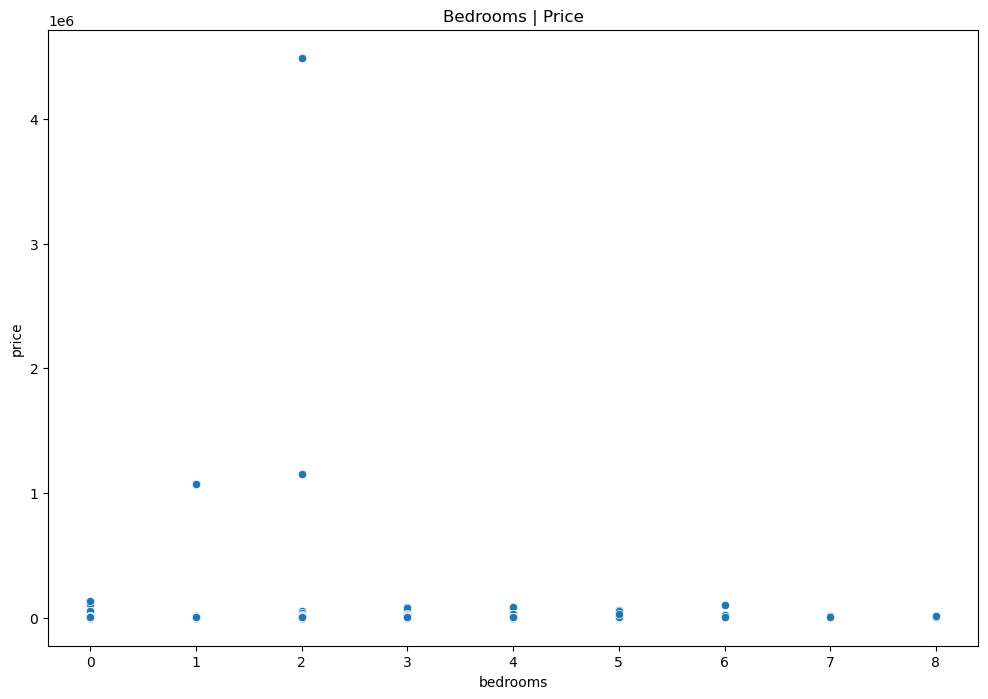

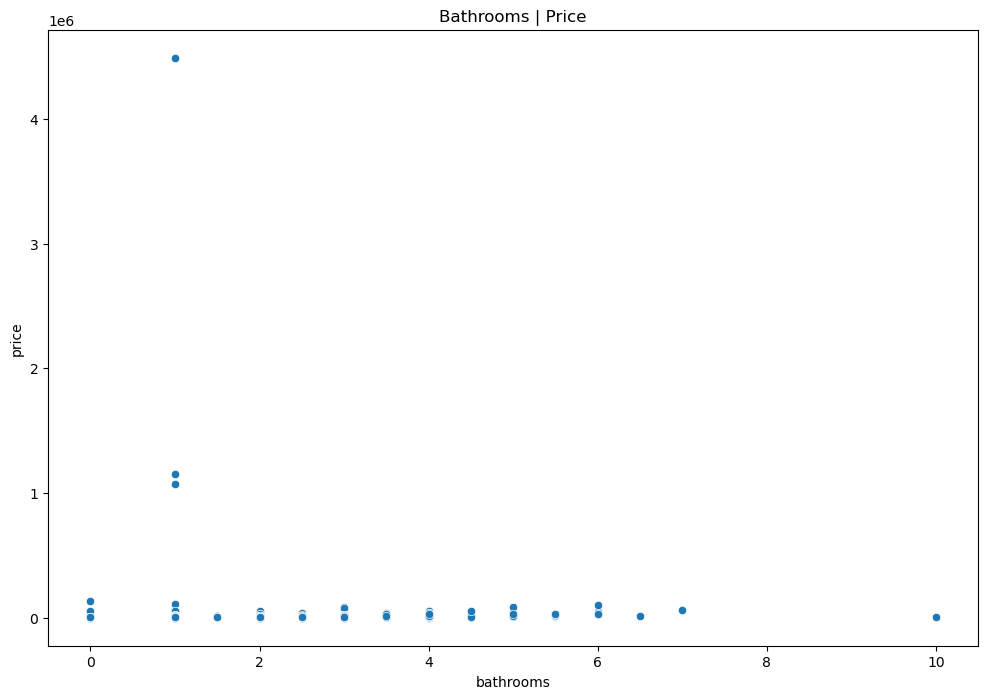

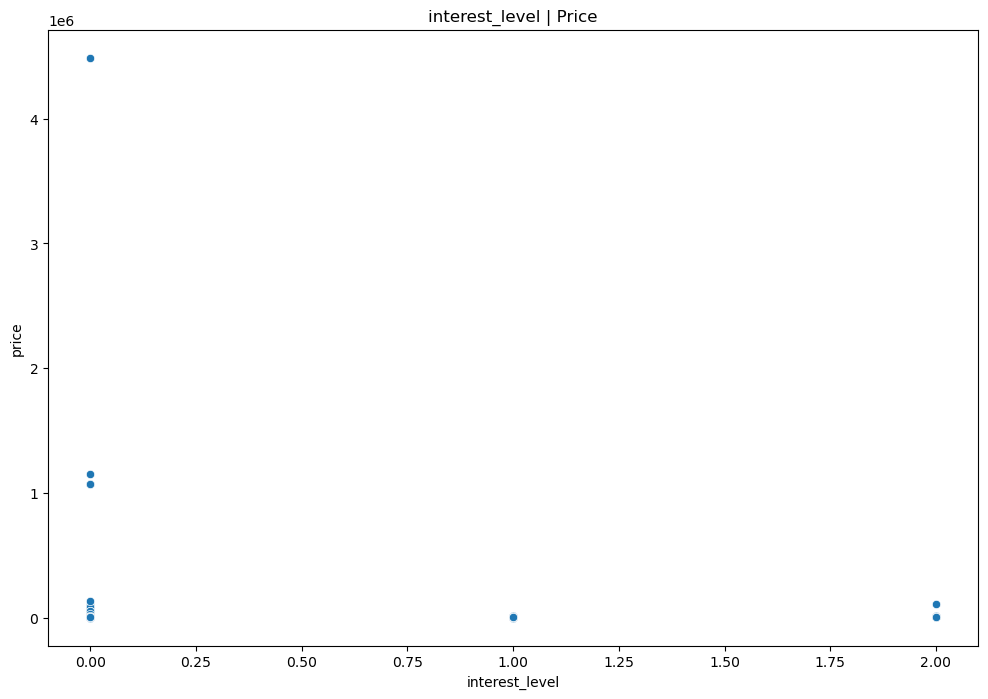

In [227]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bedrooms', y='price', data=corr_df)
plt.title("Bedrooms | Price")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='bathrooms', y='price', data=corr_df)
plt.title("Bathrooms | Price")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='interest_level', y='price', data=corr_df)
plt.title("interest_level | Price")
plt.show()

In [228]:
Q1_price = corr_df['price'].quantile(0.25)
Q3_price = corr_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5 * IQR_price
higher_price = Q3_price + 1.5 * IQR_price

df_cleaned = corr_df[(corr_df['price'] >= lower_price) & (corr_df['price'] <= higher_price)]

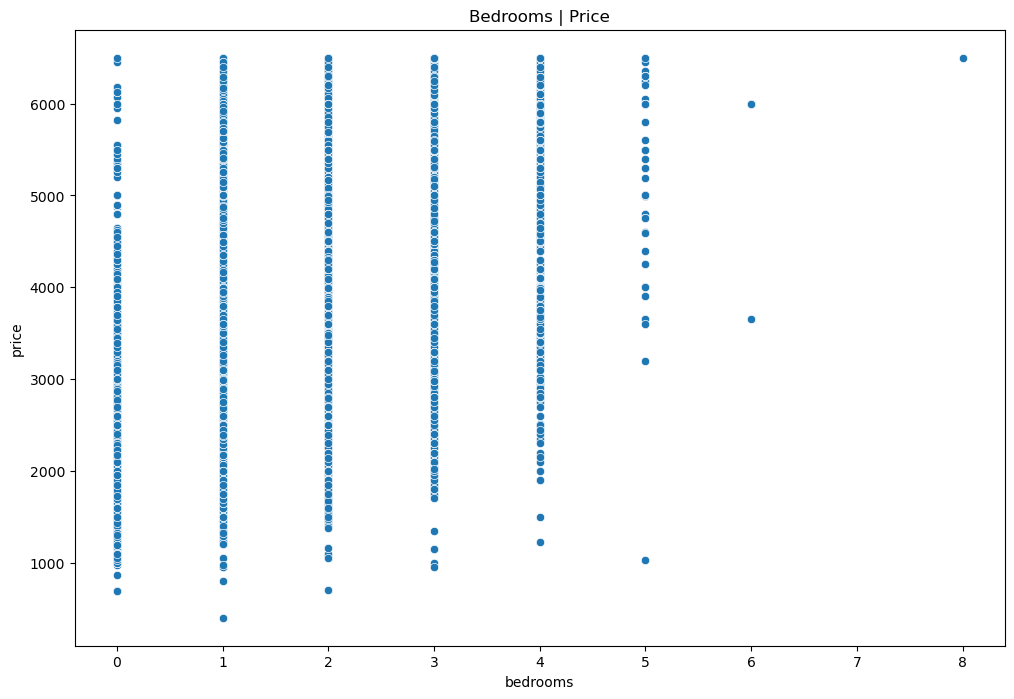

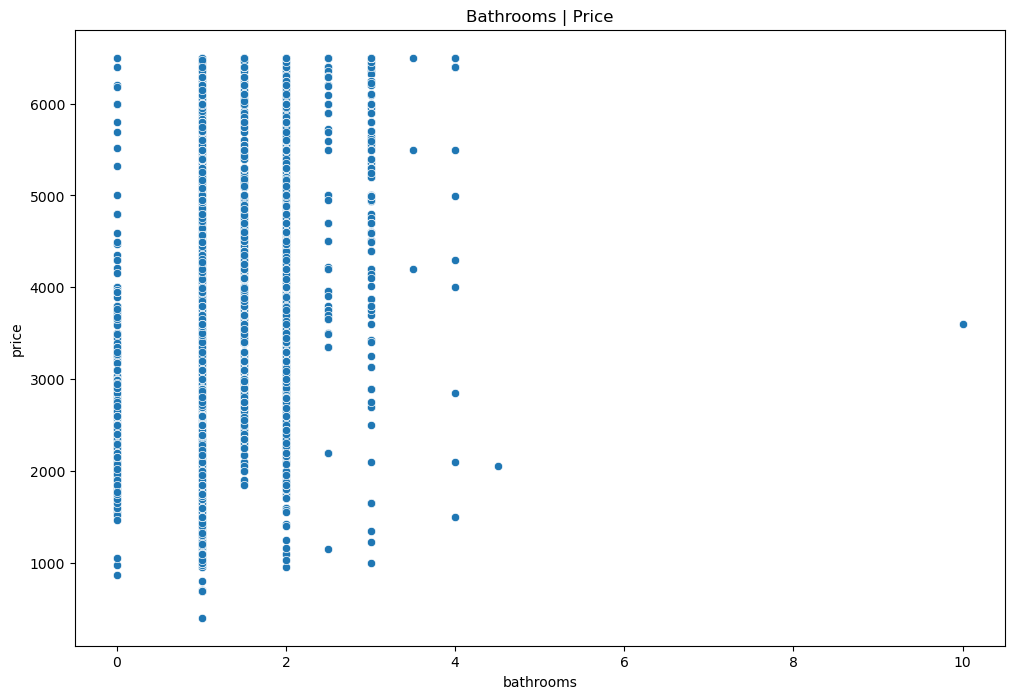

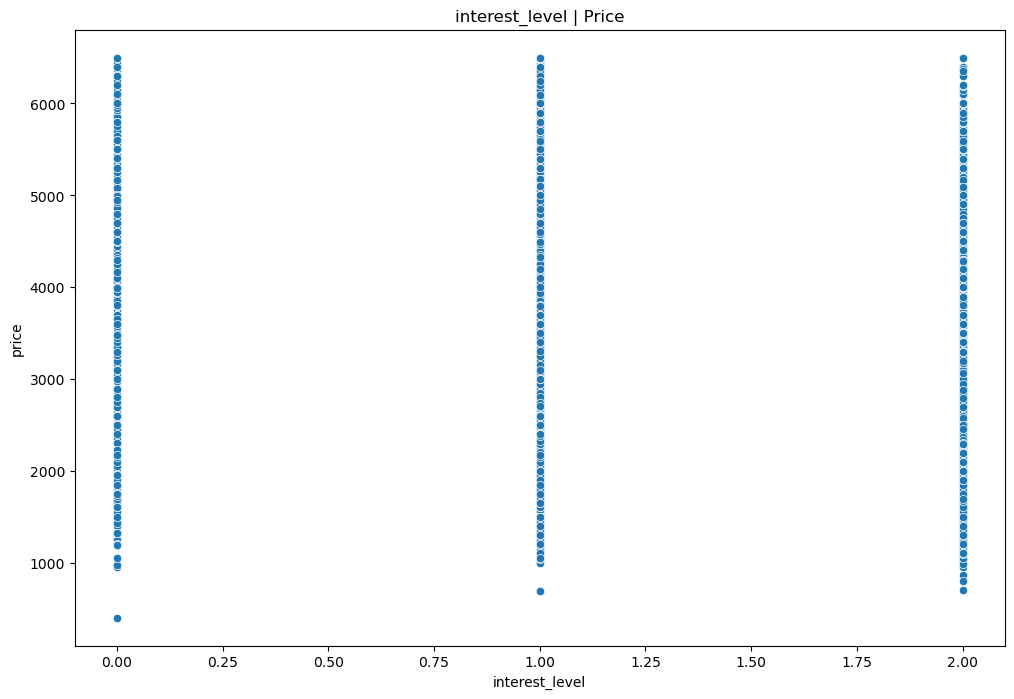

In [229]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bedrooms', y='price', data=df_cleaned)
plt.title("Bedrooms | Price")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='bathrooms', y='price', data=df_cleaned)
plt.title("Bathrooms | Price")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='interest_level', y='price', data=df_cleaned)
plt.title("interest_level | Price")
plt.show()

## Creating features

In [230]:
df_cleaned.head()

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795


In [231]:
df_cleaned = df_cleaned.copy()
df_cleaned['bath_for_each_bed'] = np.where(df_cleaned['bathrooms'] == df_cleaned['bedrooms'], 1, 0)
df_cleaned['price_per_bedroom'] = np.where(df_cleaned['bedrooms'] == 0, 0, df_cleaned['price'] / df_cleaned['bedrooms'])
df_cleaned.head()

,bathrooms,bedrooms,interest_level,price,bath_for_each_bed,price_per_bedroom
4,1.0,1,1,2400,1,2400.0
6,1.0,2,0,3800,0,1900.0
9,1.0,2,1,3495,0,1747.5
10,1.5,3,1,3000,0,1000.0
15,1.0,0,0,2795,0,0.0


## WE can see correlation between price per bedroom and price and detect how many 1+ bedroomms houses we can have

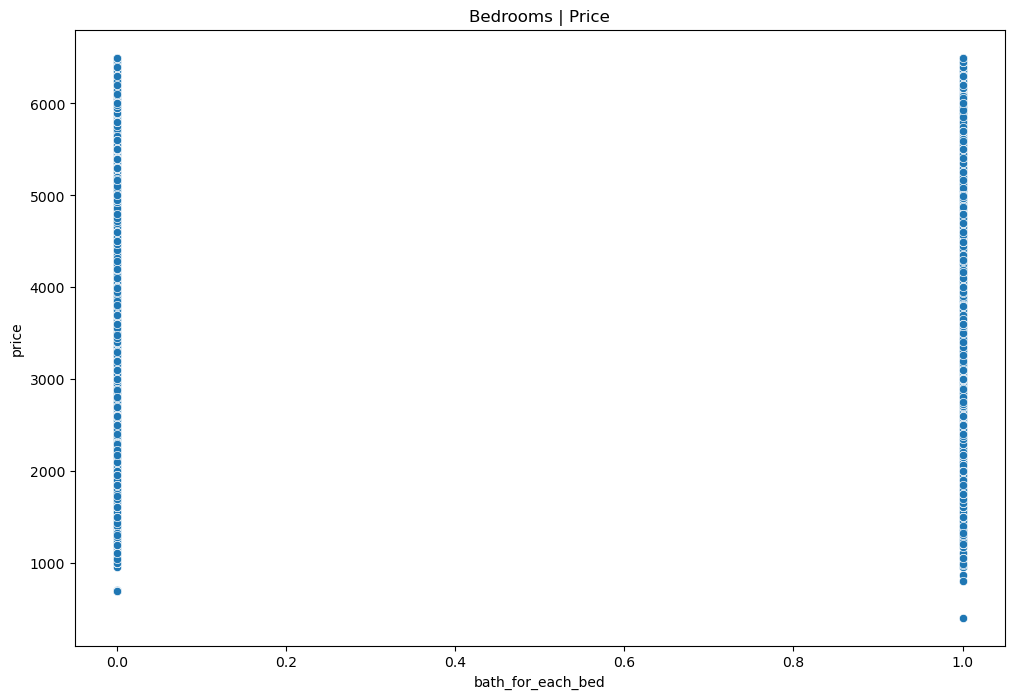

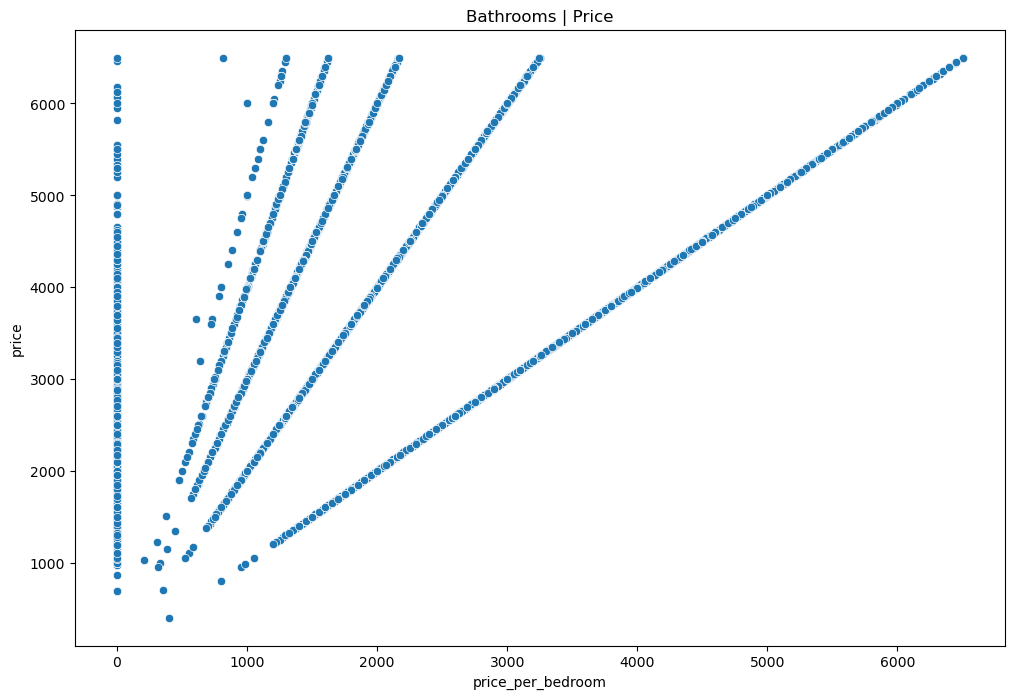

In [232]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bath_for_each_bed', y='price', data=df_cleaned)
plt.title("Bedrooms | Price")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price_per_bedroom', y='price', data=df_cleaned)
plt.title("Bathrooms | Price")
plt.show()

## Polynominal features

In [233]:
poly = PolynomialFeatures(10)

In [234]:
train_features = train_df.copy()
train_features = train_features[['bedrooms', 'bathrooms']]
train_target = train_df['price']
train_Poly = poly.fit_transform(train_features)
train_Poly

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 2., 1., ..., 4., 2., 1.],
       [1., 2., 1., ..., 4., 2., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 2., 1., ..., 4., 2., 1.],
       [1., 3., 1., ..., 9., 3., 1.]])

In [235]:
test_features = test_df.copy()
test_features = test_features[['bedrooms', 'bathrooms']]
test_target = test_df['price']
test_Poly = poly.fit_transform(test_features)
test_Poly

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.000e+00, 1.000e+00, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.000e+00, 2.000e+00, ..., 1.024e+03, 1.024e+03,
        1.024e+03],
       [1.000e+00, 3.000e+00, 1.000e+00, ..., 9.000e+00, 3.000e+00,
        1.000e+00]])

## Train models

##### Linear Regression

In [236]:
columns = ['model', 'train', 'test']
result_MAE = pd.DataFrame(columns=columns)
result_RMSE = pd.DataFrame(columns=columns)

In [237]:
lr = LinearRegression()
lr.fit(train_features, train_target)
train_pred = lr.predict(train_features)
train_mae = mean_absolute_error(train_target, train_pred)
train_rmse = root_mean_squared_error(train_target, train_pred)
lr.fit(test_features, test_target)
test_pred = lr.predict(test_features)
test_mae = mean_absolute_error(test_target, test_pred)
test_rmse = root_mean_squared_error(test_target, test_pred)
new_row = {'model': 'LinearRegression', 'train': train_mae, 'test': test_mae}
result_MAE = pd.concat([result_MAE, pd.DataFrame([new_row])], ignore_index=True)
new_row = {'model': 'LinearRegression', 'train': train_rmse, 'test': test_rmse}
result_RMSE = pd.concat([result_RMSE, pd.DataFrame([new_row])], ignore_index=True)

/var/folders/rl/63cr5yk5557db_w0k3_knwm00000gn/T/ipykernel_9022/255526022.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, pd.DataFrame([new_row])], ignore_index=True)
/var/folders/rl/63cr5yk5557db_w0k3_knwm00000gn/T/ipykernel_9022/255526022.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, pd.DataFrame([new_row])], ignore_index=True)


In [238]:
result_MAE

,model,train,test
0,LinearRegression,1111.027181,1043.595706


In [239]:
result_RMSE

,model,train,test
0,LinearRegression,22009.727935,9618.22915


##### Decision Tree Regression

In [240]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(train_features, train_target)
train_pred = dtr.predict(train_features)
train_mae = mean_absolute_error(train_target, train_pred)
train_rmse = root_mean_squared_error(train_target, train_pred)
dtr.fit(test_features, test_target)
test_pred = dtr.predict(test_features)
test_mae = mean_absolute_error(test_target, test_pred)
test_rmse = root_mean_squared_error(test_target, test_pred)
new_row = {'model': 'Decision_tree', 'train': train_mae, 'test': test_mae}
result_MAE = pd.concat([result_MAE, pd.DataFrame([new_row])], ignore_index=True)
new_row = {'model': 'Decision_tree', 'train': train_rmse, 'test': test_rmse}
result_RMSE = pd.concat([result_RMSE, pd.DataFrame([new_row])], ignore_index=True)

In [241]:
result_MAE

,model,train,test
0,LinearRegression,1111.027181,1043.595706
1,Decision_tree,1058.108940,945.910959


In [242]:
result_RMSE

,model,train,test
0,LinearRegression,22009.727935,9618.229150
1,Decision_tree,21992.863614,9555.402294


In [243]:
train_mean = train_target.mean()
train_median = train_target.median()

test_mean = test_target.mean()
test_median = test_target.median()

In [244]:
train_mae = mean_absolute_error(train_target, [train_mean] * len(train_target))
train_rmse = root_mean_squared_error(train_target, [train_mean] * len(train_target))

test_mae = mean_absolute_error(test_target, [test_mean] * len(test_target))
test_rmse = root_mean_squared_error(test_target, [test_mean] * len(test_target))

In [245]:
new_row = {'model': 'native mean', 'train': train_mae, 'test': test_mae}
result_MAE = pd.concat([result_MAE, pd.DataFrame([new_row])], ignore_index=True)
new_row = {'model': 'native mean', 'train': train_rmse, 'test': test_rmse}
result_RMSE = pd.concat([result_RMSE, pd.DataFrame([new_row])], ignore_index=True)

In [246]:
train_mae = mean_absolute_error(train_target, [train_median] * len(train_target))
train_rmse = root_mean_squared_error(train_target, [train_median] * len(train_target))

test_mae = mean_absolute_error(test_target, [test_median] * len(test_target))
test_rmse = root_mean_squared_error(test_target, [test_median] * len(test_target))

In [247]:
new_row = {'model': 'native median', 'train': train_mae, 'test': test_mae}
result_MAE = pd.concat([result_MAE, pd.DataFrame([new_row])], ignore_index=True)
new_row = {'model': 'native median', 'train': train_rmse, 'test': test_rmse}
result_RMSE = pd.concat([result_RMSE, pd.DataFrame([new_row])], ignore_index=True)

In [248]:
result_MAE.sort_values('test')

,model,train,test
1,Decision_tree,1058.108940,945.910959
0,LinearRegression,1111.027181,1043.595706
3,native median,1400.344403,1322.640673
2,native mean,1549.642449,1440.961299


In [249]:
result_RMSE.sort_values('test')

,model,train,test
1,Decision_tree,21992.863614,9555.402294
0,LinearRegression,22009.727935,9618.229150
2,native mean,22066.642317,9713.026562
3,native median,22077.122545,9731.481148


## Results

#### Best model for both metrics (MAE & RMSE) is Decision Tree. In our example, we use data without purging outliers from original df, thats why linear shows worse results, but if we clean df from outliers as we did early on to plot our data in human readable way, results may be different. Coz data shows us theres a definetely a linear correlation between bedrooms and price columns. In terms of flexibility DTR still better than LR, LR used for regression the more, DTR for more complex classification and as well regression tasks

#### Our 'native' metrics became worst models in both comparisons due to pure statistics without deep cluster analytics behind data isn`t as effective as training models